<a href="https://colab.research.google.com/github/shemanto27/spam-comments-detection-using-Machine-Learning/blob/main/Spam_Comment_Detection_and_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# About the Dataset:
📌Dataset is collected from Kaggle: [YouTube Spam Collection Data Set](https://www.kaggle.com/datasets/lakshmi25npathi/images). It has five datasets composed by 1,956 real messages extracted from five videos that were among the 10 most viewed on the collection period.
#My Planning:
I will use this dataset to train a ML model to detect spam comment and **use this model in my Django Blog website's comment section to detect spam comments.**
## Spam comments will be keep on holds to get reviewed by the admin and if it is permitted then it will be visible for the other reader of the blog.


### Step-1: Import the librarys and data cleaning

In [ ]:
# python librarys
import pandas as pd
import numpy as np

#EDA
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
psy_data = pd.read_csv('/content/Youtube01-Psy.csv')
psy_data.head(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [ ]:
# data exploration
psy_data.info()
# checking null value
psy_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


,0
COMMENT_ID,0
AUTHOR,0
DATE,0
CONTENT,0
CLASS,0


In [ ]:
# getting the columns I need for training and drops the rest
psy_data = data[['CONTENT', 'CLASS']]
psy_data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [ ]:
kp_data = pd.read_csv('/content/Youtube02-KatyPerry.csv')
lmfo_data = pd.read_csv('/content/Youtube03-LMFAO.csv')
eminem_data = pd.read_csv('/content/Youtube04-Eminem.csv')
sakira_data = pd.read_csv('/content/Youtube05-Shakira.csv')

#apending all column
df = pd.concat([kp_data, lmfo_data, eminem_data, sakira_data], axis=0)
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [ ]:
df = df[['CONTENT', 'CLASS']]
df.head()

,CONTENT,CLASS
0,i love this so much. AND also I Generate Free ...,1
1,http://www.billboard.com/articles/columns/pop-...,1
2,Hey guys! Please join me in my fight to help a...,1
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [ ]:
#final dataframe of all data
df = pd.concat([psy_data, df], axis=0)
df.head(10)

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
5,"Hey, check out my new website!! This site is a...",1
6,Subscribe to my channel ﻿,1
7,i turned it on mute as soon is i came on i jus...,0
8,You should check my channel for Funny VIDEOS!!﻿,1
9,and u should.d check my channel and tell me wh...,1


In [ ]:
# finding null value
df.isnull().sum()

,0
CONTENT,0
CLASS,0


In [ ]:
#finding duplicated values
df.duplicated().sum()

196

In [ ]:
#droping duplicated value
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
#final shape of the data
df.shape

(1760, 2)

###Step-2: EDA

In [ ]:
df['CLASS'].value_counts()

,count
CLASS,
0,919
1,841


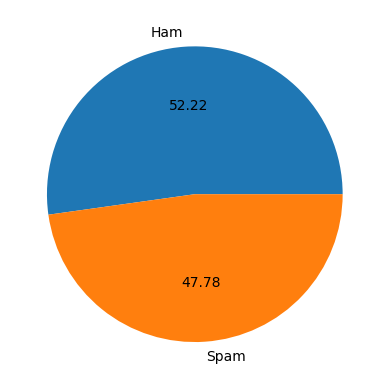

In [ ]:
#piechart for seeing data distribution (Is data imbalanced? Ans:NO)
plt.pie(df['CLASS'].value_counts(), labels=['Ham', 'Spam'], autopct='%0.2f')
plt.show()

###Step-3: Text Preprocessing

###Step-3: Model building

###Step-4: Evaluation

###Step-5: Improvement
